In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [7]:
df=pd.read_csv('01.csv')
df.head()

,time,AT,BG,BP,BS,BX,DO,DOPer,HU,NJD,...,WSE,WSM,WT,YBG,YLS,YZQ,ZBG,ZD,ZQ,ZZQ
0,202301010000,1.0,0.8,1030.3,NaN,50,/,0.0,42,/,...,10.2,8.9,3.7,1.3,58.1,4.9,2.0,957.1,4.9,5.0
1,202301010100,0.6,0.8,1030.7,NaN,48,/,0.0,44,/,...,8.9,7.5,3.7,1.2,57.1,4.9,2.2,966.3,4.6,4.5
2,202301010200,0.6,0.7,1030.9,NaN,71,/,0.0,47,/,...,7.1,6.0,3.8,1.1,56.5,4.6,1.5,953.7,4.6,4.0
3,202301010300,0.4,0.6,1030.9,NaN,62,/,0.0,40,/,...,6.4,5.5,3.9,0.8,56.0,4.3,1.3,982.4,4.4,4.0
4,202301010400,0.4,0.5,1031.2,NaN,85,/,0.0,44,/,...,6.5,5.0,3.9,0.8,56.8,4.2,1.2,1000.1,4.2,4.0


In [191]:
df.head()['BG']

0    0.8
1    0.8
2    0.7
3    0.6
4    0.5
Name: BG, dtype: object

In [192]:
type(df.head()['BG'][0])

str

In [193]:
df.head()['BG'].astype('float')

0    0.8
1    0.8
2    0.7
3    0.6
4    0.5
Name: BG, dtype: float64

In [12]:

# df.set_index('time',inplace=True)
# print(df.columns.values)
# print(df.index.values)
df['time'] = pd.to_datetime(df['time'],format='%Y%m%d%H%M')
print(df['time'].head(3),df['YBG'].head(3))
# df_head100 = df.head(200)
df_head100=df

df_train_x = df_head100[['WS','WD','WSM','AT','BP']]
df_train_y = df_head100['YBG']
#print(df_head100)
#print(df_train_y[df_train_y == '/'])
df_head100['YBG'] = df_head100['YBG'].replace('/', np.nan)
df_head100['WS']= df_head100['WS'].replace('/', np.nan)
df_head100['WD']= df_head100['WD'].replace('/', np.nan)
df_head100['WSM']= df_head100['WSM'].replace('/', np.nan)
df_head100['AT']= df_head100['AT'].replace('/', np.nan)
df_head100['BP']= df_head100['BP'].replace('/', np.nan)

df_data = df_head100[['WS','WD','WSM','AT','BP','YBG']]
df_data = df_data.dropna(subset=['YBG', 'WS'])
df_data = df_data.dropna(subset=['WS','WD','WSM','AT','BP','YBG'])
df_data['YBG']=df_data['YBG'].astype('float')

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
Name: time, dtype: datetime64[ns] 0    1.3
1    1.2
2    1.1
Name: YBG, dtype: object


In [9]:
type(df_data['YBG'][0])

numpy.float64

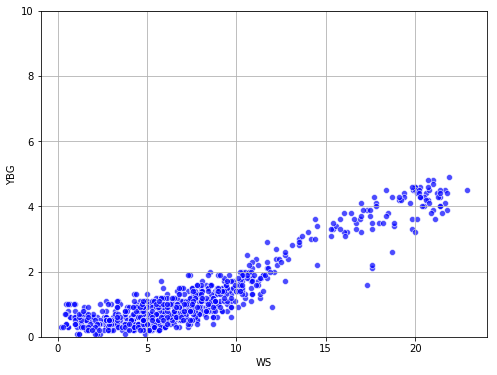

In [29]:
# 绘制曲线图
#plt.plot(df_head100['time'],df_head100['YBG'],linestyle='-', label='Solid',color='red')
#plt.plot(df_head100['time'],df_head100['WS'],linestyle='-', label='Solid',color='blue')
#plt.plot(df_head100['time'],df_head100['WD'],linestyle='-', label='Solid',color='green')
#plt.plot(df_head100['time'],df_head100['WSM'],linestyle='-', label='Solid',color='yellow')
#plt.plot(df_head100['time'],df_head100['AT'],linestyle='-', label='Solid',color='pink')
#plt.plot(df_head100['time'],df_head100['BP'],linestyle='-', label='Solid',color='purple')
#plt.ylim(0, df['BG'].max()+1)
#plt.scatter(df_head100['WS'],df_train_y,linestyle='-', label='Solid',color='red')
plt.figure(figsize=(8, 6)) 
#print(df_data['BG'].max())
plt.ylim(0, 10)
sns.scatterplot(x='WS', y='YBG', data=df_data, color='blue', alpha=0.7)

# 显示网格线
plt.grid(True)
plt.show()


In [198]:

# x_reshaped = df_head100['WS'].reshape()
model1 = LinearRegression()
model1.fit(df_head100['WS'],df_head100['YBG'])
y1_pred = model1.predict(df_head100['WS'])
plt.plot(df_head100['WS'],y1_pred,linestyle='-', label='Solid',color='purple')

# 设置图表标题和坐标轴标签
plt.xlabel('time')
plt.ylabel('YBG')
plt.ylabel('WS')

ValueError: Expected 2D array, got 1D array instead:
array=[ 6.8  5.7  4.6  4.9  4.4  4.4  5.   4.6  3.6  3.9  3.3  3.6  3.8  4.2
  4.2  4.2  4.8  3.2  2.2  2.6  2.8  2.8  2.6  1.6  2.2  1.6  1.5  3.
  2.9  4.3  3.9  6.   5.   5.1  4.9  4.7  3.8  3.5  1.9  1.5  1.2  0.6
  0.6  1.7  3.   4.3  4.9  5.6  5.5  5.3  5.4  5.5  4.2  3.1  1.3  0.5
  0.5  0.2  0.3  1.1  2.7  2.   2.2  3.9  5.   3.9  3.2  4.3  3.1  2.3
  2.1  1.9  1.8  1.3  1.9  1.6  2.2  2.2  2.   2.1  2.8  2.4  2.2  2.1
  1.2  1.1  1.2  1.3  1.5  2.1  1.5  2.1  1.9  1.1  1.7  2.1  2.6  3.6
  4.   4.9  5.3  4.8  5.4  5.5  5.5  6.1  5.8  7.8  7.4  8.2  7.8  7.8
  6.1  6.3  5.9  7.8  8.7  8.9  8.5  9.2  7.6  6.3  5.4  6.   6.8  6.9
  5.3  6.2  6.   6.5  6.6  7.7  6.7  7.1  7.9  5.8  3.4  3.   3.2  1.9
  0.7  5.   4.4  5.6  5.1  3.8  3.1  2.6  0.7  0.9  1.   1.8  1.9  2.4
  3.   4.2  3.8  4.7  4.1  3.6  2.9  3.3  2.9  3.1  3.6  4.2  3.8  4.7
  5.2  5.1  5.7  7.3  8.7  7.5  6.3  6.1  5.3  5.2  4.9  4.2  2.7  1.4
  1.6  1.5  2.7  5.1  7.8  8.3  9.5  8.  10.1 10.5  9.3 11.3  9.8  9.7
  9.6 10.1  8.9  8.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df_data['YBG'].values

array(['1.3', '1.2', '1.1', '0.8', '0.8'], dtype=object)

In [12]:
np.isnan(df_data['YBG']).any()

False

In [13]:
# = df_data['YBG'].values.reshape(-1, 1)
xws = df_data['WS'].values.reshape(-1, 1)
#['WS','WD','WSM','AT','BP','YBG']]
xwd = df_data['WD'].values.reshape(-1, 1)
xwsm = df_data['WSM'].values.reshape(-1, 1)
xat = df_data['AT'].values.reshape(-1, 1)
xbp = df_data['BP'].values.reshape(-1, 1)

In [16]:
y = df_data['YBG']
#y.head()

In [17]:
# 检查是否有 NaN
np.isnan(y).any()



False

In [18]:
np.isnan(x).any()

False

#用线性回归，通过ws预测ybg

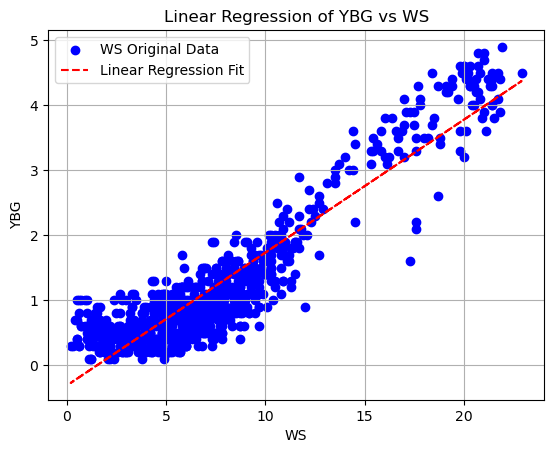

In [34]:

# 创建线性回归模型
modelws = LinearRegression()

# 拟合模型
modelws.fit(xws, y)


# 进行预测
y_predws = modelws.predict(xws)


# 绘制原始数据点
plt.scatter(xws, y, color='blue', label='WS Original Data')



# 绘制拟合曲线
plt.plot(xws, y_predws, color='red', linestyle='--', label='Linear Regression Fit')

# 添加标题和标签
plt.title('Linear Regression of YBG vs WS')
plt.ylabel('YBG')
plt.xlabel('WS')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

--------

#用线性回归，通过wd预测ybg

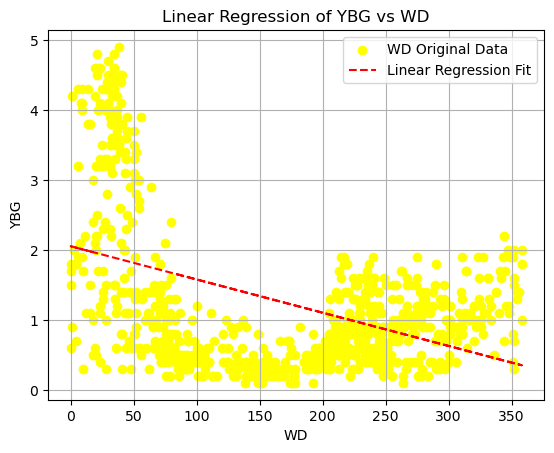

In [33]:
modelwd = LinearRegression()
modelwd.fit(xwd, y)
y_predwd = modelwd.predict(xwd)
# 绘制原始数据点
plt.scatter(xwd, y, color='yellow', label='WD Original Data')


# 绘制拟合曲线

plt.plot(xwd, y_predwd, color='red', linestyle='--', label='Linear Regression Fit')

# 添加标题和标签
plt.title('Linear Regression of YBG vs WD')
plt.ylabel('YBG')
plt.xlabel('WD')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

#用线性回归，通过wsm预测ybg

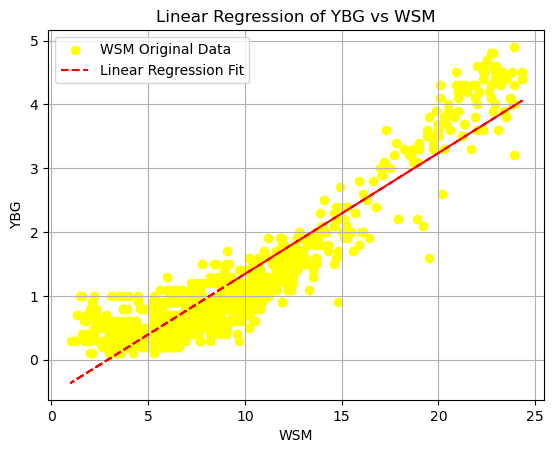

In [32]:
modelwsm = LinearRegression()
modelwsm.fit(xwsm, y)
y_predwsm = modelwsm.predict(xwsm)
# 绘制原始数据点
plt.scatter(xwsm, y, color='yellow', label='WSM Original Data')


# 绘制拟合曲线

plt.plot(xwsm, y_predwsm, color='red', linestyle='--', label='Linear Regression Fit')

# 添加标题和标签
plt.title('Linear Regression of YBG vs WSM')
plt.ylabel('YBG')
plt.xlabel('WSM')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

#用线性回归，通过at预测ybg

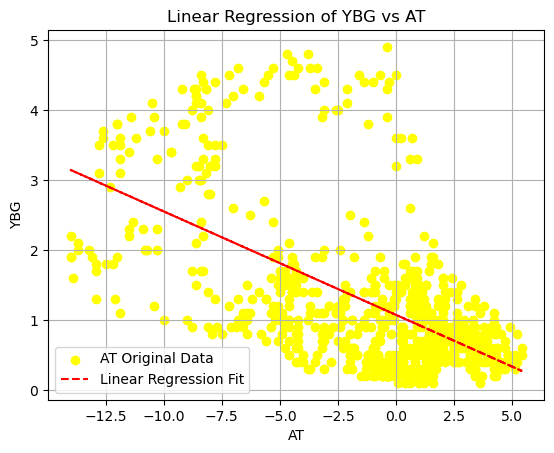

In [31]:
modelat = LinearRegression()
modelat.fit(xat, y)
y_predat = modelat.predict(xat)
# 绘制原始数据点
plt.scatter(xat, y, color='yellow', label='AT Original Data')


# 绘制拟合曲线

plt.plot(xat, y_predat, color='red', linestyle='--', label='Linear Regression Fit')

# 添加标题和标签
plt.title('Linear Regression of YBG vs AT')
plt.ylabel('YBG')
plt.xlabel('AT')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

#用线性回归，通过bp预测ybg

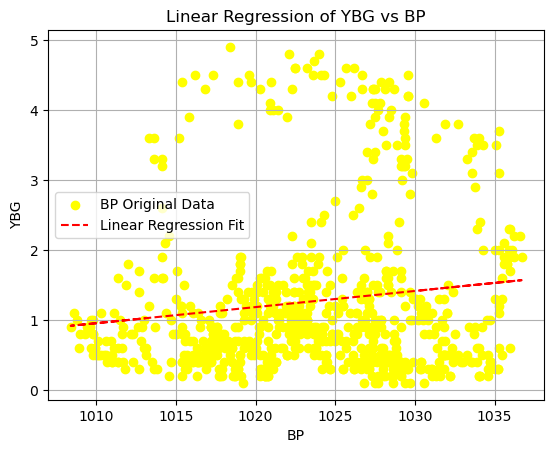

In [30]:
modelbp = LinearRegression()
modelbp.fit(xbp, y)
y_predbp = modelbp.predict(xbp)
# 绘制原始数据点
plt.scatter(xbp, y, color='yellow', label='BP Original Data')


# 绘制拟合曲线

plt.plot(xbp, y_predbp, color='red', linestyle='--', label='Linear Regression Fit')

# 添加标题和标签
plt.title('Linear Regression of YBG vs BP')
plt.ylabel('YBG')
plt.xlabel('BP')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

# 使用多项式预测

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

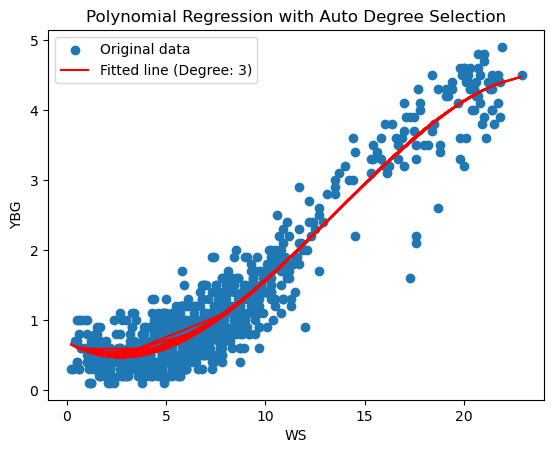

Best polynomial degree: 3
Best polynomial: 0.68 + -0.17x + 0.03x^2 + -0.00x^3


In [ ]:


# 定义要尝试的多项式次数范围
degrees = range(1, 11)
best_degree = None
best_score = float('-inf')

# 遍历不同的多项式次数
for degree in degrees:
    # 创建多项式特征
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(xws)

    # 创建线性回归模型
    model = LinearRegression()

    # 使用交叉验证评估模型
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = scores.mean()

    # 记录最佳次数和最佳得分
    if mean_score > best_score:
        best_score = mean_score
        best_degree = degree

# 使用最佳次数训练最终模型
best_poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_best_poly = best_poly_features.fit_transform(xws)
final_model = LinearRegression()
final_model.fit(X_best_poly, y)



# 获取系数和截距
coefficients = final_model.coef_.flatten()
# 检查 intercept_ 是否为标量
if np.isscalar(final_model.intercept_):
    intercept = final_model.intercept_
else:
    intercept = final_model.intercept_[0]

# 构建多项式表达式
polynomial_str = f"{intercept:.2f}"
for i, coef in enumerate(coefficients):
    if coef != 0:
        if i == 0:
            polynomial_str += f" + {coef:.2f}x"
        else:
            polynomial_str += f" + {coef:.2f}x^{i + 1}"

# 预测
x_test = xws
X_test_best_poly = best_poly_features.transform(x_test)
y_pred = final_model.predict(X_test_best_poly)

# 可视化结果
plt.scatter(xws, y, label='Original data')
plt.plot(x_test, y_pred, color='red', label=f'Fitted line (Degree: {best_degree})')
plt.title('Polynomial Regression with Auto Degree Selection')
plt.xlabel('WS')
plt.ylabel('YBG')
plt.legend()
plt.show()

print(f"Best polynomial degree: {best_degree}")    
print(f"Best polynomial: {polynomial_str}")

#x轴增加一个WSM的feature

## 使用两个feature

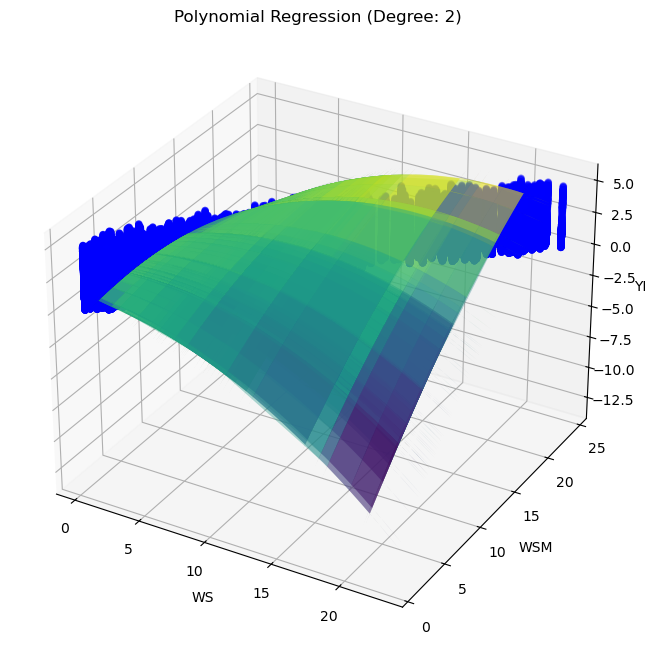

Best polynomial degree: 2
Polynomial equation: 0.27 + -0.16*x1 + 0.13*x2 + -0.02*x1^2 + 0.04*x1 x2 + -0.01*x2^2
Mean Squared Error (MSE) Loss: 0.0885


In [53]:
X = np.column_stack((xws, xwsm))

# 定义要尝试的多项式次数范围
degrees = range(1, 3)
best_degree = None
best_score = float('-inf')

# 遍历不同的多项式次数
for degree in degrees:
    # 创建多项式特征
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    # 创建线性回归模型
    model = LinearRegression()

    # 使用交叉验证评估模型
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = scores.mean()

    # 记录最佳次数和最佳得分
    if mean_score > best_score:
        best_score = mean_score
        best_degree = degree

# 使用最佳次数训练最终模型
best_poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_best_poly = best_poly_features.fit_transform(X)
final_model = LinearRegression()
final_model.fit(X_best_poly, y)

# 获取系数和截距
coefficients = final_model.coef_
intercept = final_model.intercept_

# 获取特征名称
feature_names = best_poly_features.get_feature_names_out(['x1', 'x2'])

# 构建多项式方程
equation = f"{intercept:.2f}"
for coef, feat_name in zip(coefficients, feature_names):
    if coef != 0:
        equation += f" + {coef:.2f}*{feat_name}"

# 预测
y_pred = final_model.predict(X_best_poly)

# 计算均方误差损失
mse_loss = mean_squared_error(y, y_pred)

# 为了可视化，我们可以在一个网格上进行预测
x1_grid, x2_grid = np.meshgrid(xws, xwsm)
X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
X_grid_poly = best_poly_features.transform(X_grid)
y_grid_pred = final_model.predict(X_grid_poly).reshape(x1_grid.shape)

# 可视化结果
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xws, xwsm, y, c='b', marker='o', label='Original data')
surface_alpha = 0.2
ax.plot_surface(x1_grid, x2_grid, y_grid_pred, cmap='viridis', alpha=surface_alpha)
ax.set_xlabel('WS')
ax.set_ylabel('WSM')
ax.set_zlabel('YBG')
ax.set_title(f'Polynomial Regression (Degree: {best_degree})')
plt.show()

# 打印最佳多项式次数、多项式方程和损失函数值
print(f"Best polynomial degree: {best_degree}")
print(f"Polynomial equation: {equation}")
print(f"Mean Squared Error (MSE) Loss: {mse_loss:.4f}")

#### step1: 数据按年保存为csv文件
#### step2:time要根据起止时间,步长为1h,将缺失的时间补齐(填充np.nan)

In [14]:
df.head()

,AT,BG,BP,BS,BX,DO,DOPer,HU,NJD,PH,...,WSE,WSM,WT,YBG,YLS,YZQ,ZBG,ZD,ZQ,ZZQ
time,,,,,,,,,,,,,,,,,,,,,
202301010000,1.0,0.8,1030.3,NaN,50,/,0.0,42,/,/,...,10.2,8.9,3.7,1.3,58.1,4.9,2.0,957.1,4.9,5.0
202301010100,0.6,0.8,1030.7,NaN,48,/,0.0,44,/,/,...,8.9,7.5,3.7,1.2,57.1,4.9,2.2,966.3,4.6,4.5
202301010200,0.6,0.7,1030.9,NaN,71,/,0.0,47,/,/,...,7.1,6.0,3.8,1.1,56.5,4.6,1.5,953.7,4.6,4.0
202301010300,0.4,0.6,1030.9,NaN,62,/,0.0,40,/,/,...,6.4,5.5,3.9,0.8,56.0,4.3,1.3,982.4,4.4,4.0
202301010400,0.4,0.5,1031.2,NaN,85,/,0.0,44,/,/,...,6.5,5.0,3.9,0.8,56.8,4.2,1.2,1000.1,4.2,4.0
